<a href="https://colab.research.google.com/github/samiha-mahin/A_Deep_Learning_Repo/blob/main/Deep_Learning_Study1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**TabNet**

## 🧠 What is TabNet?

**TabNet** is a **deep learning architecture designed for tabular data**, introduced by Google Cloud AI researchers. Unlike traditional models like XGBoost or Random Forests, TabNet learns to select **important features at each decision step** using **sequential attention**.

**TabNet** was proposed by the researchers at Google Cloud in the year 2019. The idea behind TabNet is to effectively apply deep neural networks on tabular data which still consists of a large portion of users and processed data across various applications such as healthcare, banking, retail, finance, marketing, etc.

TabNet is especially useful when:

* You have **structured/tabular data** (like CSV files or dataframes).
* You want to **preserve interpretability**.
* You want the **power of deep learning**, but with **explainability like tree-based models**.

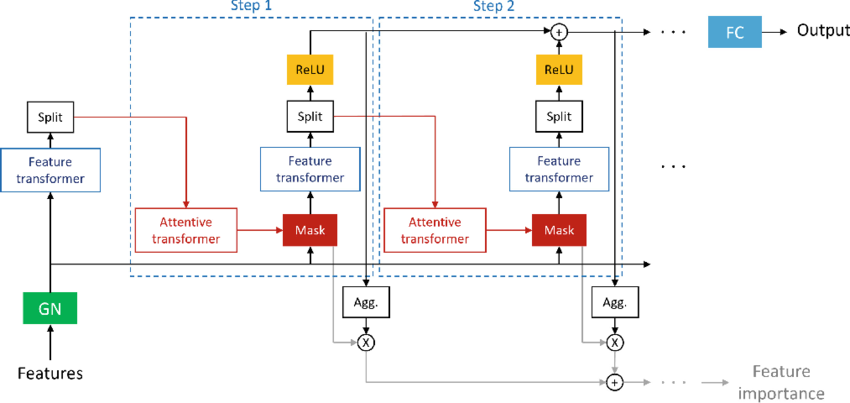


---

## 🧩 Key Concepts

| Concept                      | Explanation                                                           |
| ---------------------------- | --------------------------------------------------------------------- |
| **Sequential Attention**     | At each step, the model learns which features to focus on.            |
| **Sparse Feature Selection** | Uses attention masks to focus only on relevant features.              |
| **Interpretable**            | Can visualize which features were important for each prediction.      |
| **End-to-End Learning**      | All parts of the model are trained together like a normal neural net. |

---

## 🔨 Architecture Overview

### Components:

1. **Encoder**: Transforms input into a decision representation.
2. **Attentive Transformer**: Learns which features to select next.
3. **Decision Step**: Makes a partial decision using selected features.
4. **Aggregation**: Combines all decision steps to make the final prediction.

---

## 📊 Example: TabNet on a Health Dataset (e.g., PCOS or Diabetes)

Let’s say we have a dataset:

| Age | BMI | Glucose | Insulin | PCOS (Yes/No) |
| --- | --- | ------- | ------- | ------------- |
| 25  | 30  | 140     | 15      | Yes           |
| 30  | 22  | 110     | 6       | No            |
| ... | ... | ...     | ...     | ...           |

### 🧬 Goal: Classify whether a person has PCOS.

---

### ✅ Step-by-Step Use with PyTorch TabNet

```python
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# 1. Load your data
df = pd.read_csv("pcos_data.csv")

# 2. Preprocess
X = df.drop("PCOS", axis=1).values
y = LabelEncoder().fit_transform(df["PCOS"])  # Yes=1, No=0

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

# 3. Train TabNet
model = TabNetClassifier()
model.fit(
    X_train=X_train, y_train=y_train,
    eval_set=[(X_valid, y_valid)],
    eval_metric=['accuracy'],
    max_epochs=100,
    patience=10,
    batch_size=256, virtual_batch_size=128,
)

# 4. Predict
preds = model.predict(X_valid)
print("Accuracy:", accuracy_score(y_valid, preds))
```

---

### 🔍 Interpretation: Which features mattered?

```python
import matplotlib.pyplot as plt

# Explain instance-level decisions
explain_matrix, masks = model.explain(X_valid)

# Visualize first decision step's mask
plt.imshow(masks[0][0].reshape(1, -1), cmap='viridis')
plt.title("Feature importance at first step for first row")
plt.yticks([])
plt.colorbar()
plt.show()
```

---

## 📈 Performance

TabNet is competitive with:

* **XGBoost**
* **LightGBM**
* **CatBoost**

But can outperform them when:

* The dataset is **large** and **complex**.
* There's a need for **feature interpretability** and **end-to-end deep learning**.

---

## 🔬 Summary

| Feature          | TabNet                                        |
| ---------------- | --------------------------------------------- |
| Data Type        | Tabular                                       |
| Attention        | Yes                                           |
| Interpretability | High                                          |
| Deep Learning    | Yes                                           |
| Handles Missing  | Yes (with proper preprocessing)               |
| Use Cases        | Health, Finance, Fraud Detection, Sensor Data |

---

## 🚀 Bonus Use Case: Predicting Fraud

Imagine you’re using TabNet on a dataset like:

| Amount | Time | Country | Card Type | Fraud (Y/N) |
| ------ | ---- | ------- | --------- | ----------- |

TabNet will:

1. Learn that **Time** and **Card Type** matter more in the 1st step.
2. Learn that **Amount** becomes important in the 2nd step.
3. Combine decisions to output **Fraud = Yes** with a **probability score**.

---

